In [24]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("/home/dom/Documents/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(0, 1, d, theta[0,1])
    i = 0
    j = 1
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==0 and j==1:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)



In [2]:
for i in range(0, 1000):
    if i % 2 == 0:
        xData = tData[i][0]
        yData = tData[i][1]

        plt.scatter(xData, yData, color = data_colour)
        plt.show()

        
#slider_depth.on_changed(update_depth)
plt.show()


NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


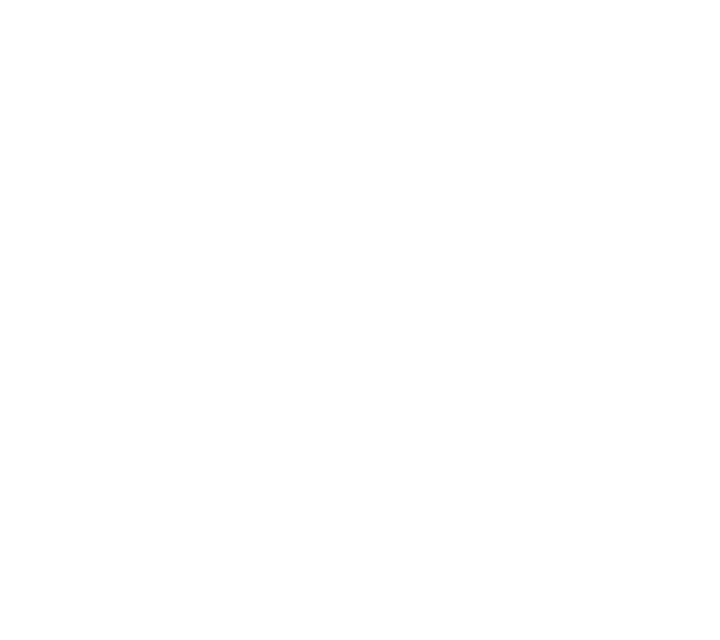

interactive(children=(FloatSlider(value=1.0, description='timestep', max=9999.0, step=1.0), Output()), _dom_cl…

<function __main__.plot_func(timestep)>

<IPython.core.display.Javascript object>


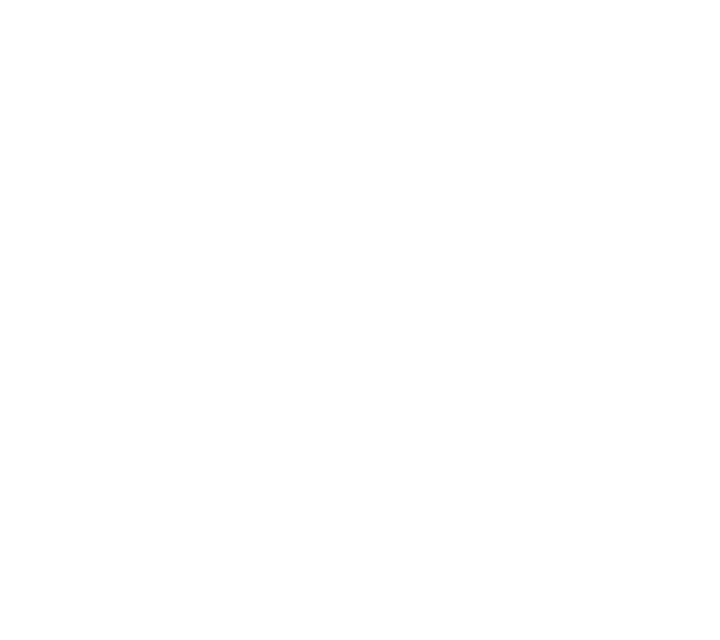

<IPython.core.display.Javascript object>


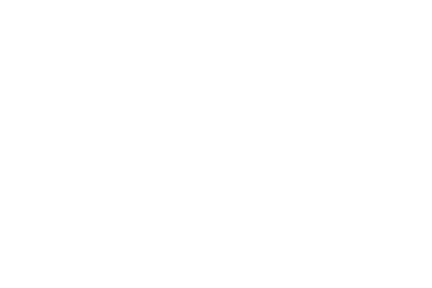

<IPython.core.display.Javascript object>


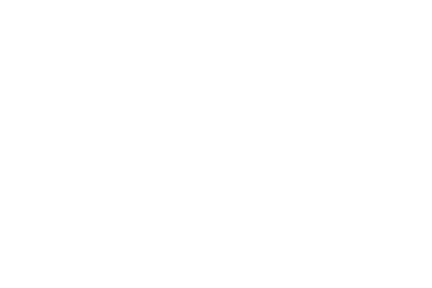

<IPython.core.display.Javascript object>


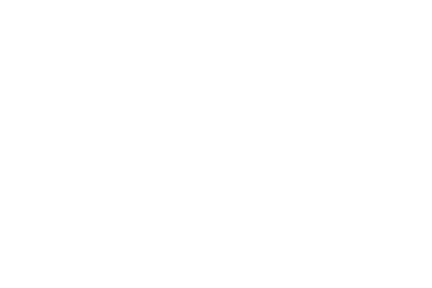

In [25]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mlxtend.plotting import plot_decision_regions

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC

import matplotlib.pyplot as plt


%matplotlib inline
%matplotlib notebook

import numpy as np

fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title('SVM Decision Region Boundary', size=16)

def plot_func(timestep):
    fig.clear()
    xData = tData[int(timestep)][0]
    yData = tData[int(timestep)][1]
    nData = np.vstack((xData, yData)).T

    #plt.scatter(xData, yData, color = data_colour)
    #plt.show()
    
    clf = OneVsRestClassifier(SVC(kernel='linear'), n_jobs=-1)
    clf.fit(nData, classification)
    plot_decision_regions(X=nData, 
                          y=classification.astype(np.integer),
                          clf=clf, 
                          legend=2)
    print(clf.score(nData, classification))
    plt.show()
    
interact(plot_func, timestep = widgets.FloatSlider(value=1,
                                               min=0,
                                               max=9999,
                                               step=1))



In [ ]:
sumRotMatrix = np.power(tBeta[0], 2)
for i in range(1, 1000):
    sumRotMatrix = np.add(sumRotMatrix, np.power(tBeta[i], 2))
    
fig = plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(sumRotMatrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [26]:
from sklearn.svm import SVC,LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt


accuracy = []

for i in range(10000):
    xData = tData[i][0]
    yData = tData[i][1]
    nData = np.vstack((xData, yData)).T
    
    clf = OneVsRestClassifier(SVC(kernel='poly'), n_jobs=-1)
    clf.fit(nData, classification)

    score = clf.score(nData, classification)
    accuracy.append(score)


x = list(range(0, len(accuracy)))


In [48]:


max_accuracy = max(accuracy[:999])
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

552 0.9213483146067416


In [ ]:
from mlxtend.plotting import plot_decision_regions

fig.clear()

xData = tData[max_accuracy][0]
yData = tData[max_accuracy][1]
nData = np.vstack((xData, yData)).T

clf = OneVsRestClassifier(SVC(kernel='linear'), n_jobs=-1)
clf.fit(nData, classification)

score = clf.score(nData, classification)


plot_decision_regions(X=nData, 
                      y=classification.astype(np.integer),
                      clf=clf, 
                      legend=2)

plt.title('SVM Decision Region Boundary', size=16)
plt.show()


In [3]:
import time


distanceMatrix = np.zeros((178, 178))
oldDistanceMatrix = np.zeros((178, 178))
travelMatrix = np.zeros((178, 178))

start = time.clock()

# function to look at the change in distances between points over time
for t in range(1000):
    if t % 100 == 0:
        print(time.clock() - start)

        
    travelMatrix = np.add(travelMatrix, np.absolute(np.subtract(distanceMatrix, oldDistanceMatrix)))
    if t != 0:
        oldDistanceMatrix = distanceMatrix
        distanceMatrix = np.zeros((178, 178))
        
    for i in range(len(tData[0][0])):
        x1Data = tData[t][0][i]
        y1Data = tData[t][1][i]
        
        for j in range(len(tData[0][0])):
            if i > j:
                continue
            x2Data = tData[t][0][j]
            y2Data = tData[t][1][j]
            distance = np.sqrt(((x1Data - x2Data) ** 2) + ((y1Data - y2Data) ** 2))
            distanceMatrix[i][j] = distance


travelMatrix = np.maximum(travelMatrix, travelMatrix.T)
travelMatrix

0.0003109999999999502
5.127931
10.148529
15.176331000000001
20.936784000000003
26.635104
32.761626
38.841035
44.522468
50.237067


array([[ 0.        ,  5.18038204,  5.17715721, ..., 17.42674322,
        17.15172158, 16.54409641],
       [ 0.        ,  0.        ,  6.53406904, ..., 16.28824597,
        16.63521113, 16.80959593],
       [ 0.        ,  0.        ,  0.        , ..., 13.76087073,
        13.86442543, 15.21940619],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         3.07705362,  4.35969226],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.80213772],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [6]:
travelMatrix = np.maximum(travelMatrix, travelMatrix.T)
travelMatrix

array([[ 0.        ,  5.18038204,  5.17715721, ..., 17.42674322,
        17.15172158, 16.54409641],
       [ 5.18038204,  0.        ,  6.53406904, ..., 16.28824597,
        16.63521113, 16.80959593],
       [ 5.17715721,  6.53406904,  0.        , ..., 13.76087073,
        13.86442543, 15.21940619],
       ...,
       [17.42674322, 16.28824597, 13.76087073, ...,  0.        ,
         3.07705362,  4.35969226],
       [17.15172158, 16.63521113, 13.86442543, ...,  3.07705362,
         0.        ,  3.80213772],
       [16.54409641, 16.80959593, 15.21940619, ...,  4.35969226,
         3.80213772,  0.        ]])

In [ ]:
fig, ax = plt.subplots()

min_val, max_val = 0, 15

intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in xrange(15):
    for j in xrange(15):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

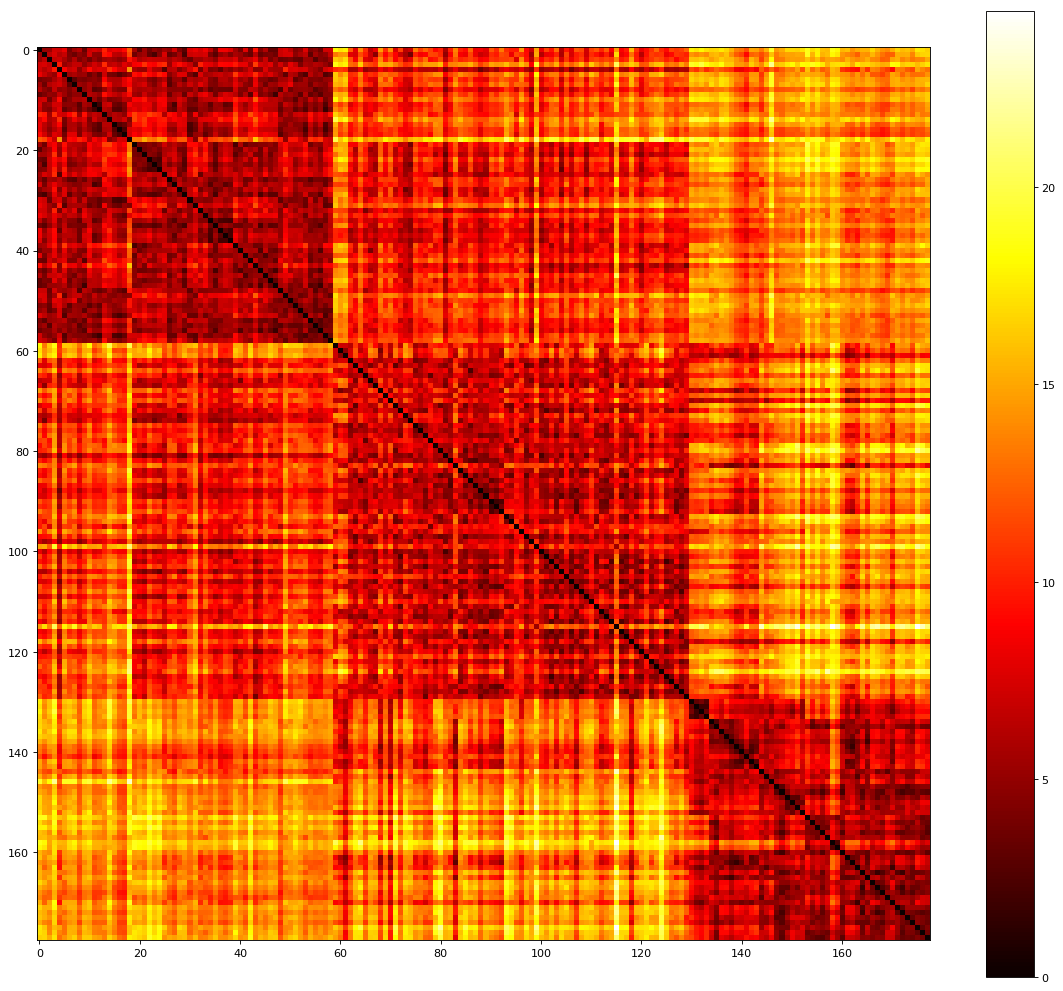

In [22]:

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(travelMatrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
travelMatrix[0]

In [ ]:
d = np.shape(travelMatrix)[0]

travelone = np.zeros((d,d))
for i in range(0,d):
    
    travelone[i][:] = np.sort(travelMatrix[i])

In [ ]:
travelsum = np.sum(travelone,axis=0)

In [ ]:
plt.plot(travelsum)

In [ ]:
travelone = np.array((d,d))
travelone[1]

In [ ]:
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)


In [ ]:
!pip install mlxtend

In [ ]:
from matplotlib import animation 
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-webm;base64,{0}" type="video/webm">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.webm') as f:
            anim.save(f.name, fps=6, extra_args=['-vcodec', 'libvpx'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")

    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title('SVM Decision Region Boundary', size=16)

def plot_func(timestep):
    fig.clear()
    xData = tData[int(timestep)][0]
    yData = tData[int(timestep)][1]
    nData = np.vstack((xData, yData)).T

    #plt.scatter(xData, yData, color = data_colour)
    #plt.show()
    
    clf = OneVsRestClassifier(SVC(kernel='linear'), n_jobs=-1)
    clf.fit(nData, classification)
    plot_decision_regions(X=nData, 
                          y=classification.astype(np.integer),
                          clf=clf, 
                          legend=2)
    print(clf.score(nData, classification))
    plt.show()
    
    
    


def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, plot_func,
                               frames=1000, interval=20, blit=True)

FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('test.mp4', writer = FFwriter)


In [7]:
import igraph

In [8]:
g = igraph.Graph.Adjacency(travelMatrix.tolist())

In [16]:
plot = igraph.plot(g, bbox=(1920, 1080))

In [17]:
plot.show()

In [19]:
np.savetxt("travelMatrix1000.csv", travelMatrix, delimiter=",")


In [28]:
NN_accuracy = np.loadtxt("/home/dom/Documents/MPhys/TheGrandTour/NNAcc.csv", delimiter=",")

In [29]:
NN_accuracy

array([0.53932584, 0.54213483, 0.53932584, 0.5252809 , 0.52808989,
       0.52808989, 0.5252809 , 0.5252809 , 0.52808989, 0.53370787,
       0.53651686, 0.54775281, 0.55337079, 0.55617978, 0.58988764,
       0.57865168, 0.5758427 , 0.58988764, 0.58426966, 0.58988764,
       0.59550562, 0.59831461, 0.61516854, 0.62078652, 0.6235955 ,
       0.63483146, 0.61516854, 0.6235955 , 0.62078652, 0.61516854,
       0.61516854, 0.62359551, 0.62359551, 0.62078652, 0.63202247,
       0.62078652, 0.61516854, 0.61516854, 0.60674157, 0.60674158,
       0.60955056, 0.61797753, 0.60955056, 0.60674157, 0.61797753,
       0.61516854, 0.61797753, 0.61797753, 0.62359551, 0.63202247,
       0.64044944, 0.66011236, 0.65449438, 0.66853932, 0.66292135,
       0.66292135, 0.66573034, 0.6741573 , 0.67977528, 0.68539326,
       0.68539326, 0.71910112, 0.73314607, 0.74438202, 0.74719101,
       0.74719101, 0.76123595, 0.75842696, 0.75842697, 0.76123595,
       0.74719101, 0.74719101, 0.7247191 , 0.72752809, 0.74157

<IPython.core.display.Javascript object>


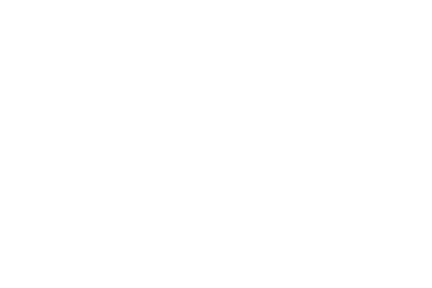

<IPython.core.display.Javascript object>


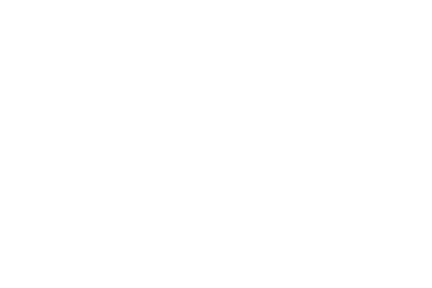

In [46]:
fig.clear()
x = list(range(0, 999))

new = plt.figure()
plt.plot(x, accuracy[:999], '-', marker=" ")
plt.plot(x, NN_accuracy, '-', marker=" ", color="g")
plt.show()
plt.savefig('NN_vs_SVM_acc.png', dpi=300)


In [31]:
accuracy

[0.7752808988764045,
 0.7752808988764045,
 0.7865168539325843,
 0.797752808988764,
 0.8033707865168539,
 0.797752808988764,
 0.7865168539325843,
 0.7584269662921348,
 0.7471910112359551,
 0.7134831460674157,
 0.702247191011236,
 0.6853932584269663,
 0.6629213483146067,
 0.651685393258427,
 0.6348314606741573,
 0.5786516853932584,
 0.5617977528089888,
 0.5617977528089888,
 0.5674157303370787,
 0.5674157303370787,
 0.5674157303370787,
 0.5842696629213483,
 0.5786516853932584,
 0.5786516853932584,
 0.5786516853932584,
 0.5730337078651685,
 0.5730337078651685,
 0.5674157303370787,
 0.5730337078651685,
 0.5730337078651685,
 0.5786516853932584,
 0.5786516853932584,
 0.5786516853932584,
 0.5730337078651685,
 0.5674157303370787,
 0.5674157303370787,
 0.6067415730337079,
 0.5955056179775281,
 0.5955056179775281,
 0.601123595505618,
 0.601123595505618,
 0.6067415730337079,
 0.6067415730337079,
 0.6179775280898876,
 0.6179775280898876,
 0.6067415730337079,
 0.6067415730337079,
 0.601123595505618,

In [33]:
len(accuracy[:999])

999